In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [168]:
df=pd.read_csv('Netflix Dataset.csv', low_memory=False)

In [169]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [171]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [172]:
df.duplicated().value_counts()

,count
False,7787
True,2


In [173]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [174]:
df.drop_duplicates(inplace=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


In [176]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [177]:
df.drop(['Director'], axis=1, inplace=True)

In [178]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

df['Duration_minutes'] = df['Duration'].str.extract(r'(\d+)').astype(int)
df['seasons'] = df['Duration'].apply(
    lambda x: int(x.split()[0]) if isinstance(x, str) and 'season' in x.lower() else None)
df['seasons'] = df['seasons'].astype(float)

In [179]:
df.head()

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_minutes,seasons
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,4.0
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,NaN
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,NaN
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,NaN
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,NaN


In [180]:
rating_map = {
    'TV-Y': 1, 'TV-Y7': 2, 'G': 2, 'PG': 3, 'PG-13': 4,
    'TV-14': 5, 'R': 6, 'TV-MA': 7, 'NC-17': 8
}
df['rating_score'] = df['Rating'].map(rating_map)

df['rating_score'].value_counts()

,count
rating_score,
7.0,2863
5.0,1931
6.0,665
4.0,386
2.0,310
1.0,280
3.0,247
8.0,3


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Show_Id           7787 non-null   object        
 1   Category          7787 non-null   object        
 2   Title             7787 non-null   object        
 3   Cast              7069 non-null   object        
 4   Country           7280 non-null   object        
 5   Release_Date      7689 non-null   datetime64[ns]
 6   Rating            7780 non-null   object        
 7   Duration          7787 non-null   object        
 8   Type              7787 non-null   object        
 9   Description       7787 non-null   object        
 10  Duration_minutes  7787 non-null   int64         
 11  seasons           2410 non-null   float64       
 12  rating_score      6685 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 851.7+ KB


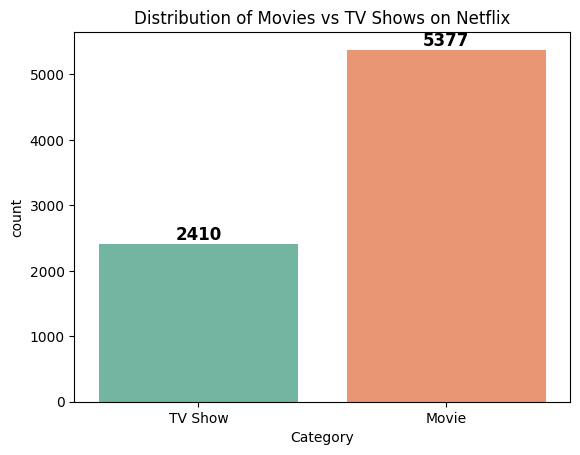

In [182]:
ax = sns.countplot(data=df, x='Category', hue='Category', palette='Set2')
plt.title("Distribution of Movies vs TV Shows on Netflix")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, weight='bold')
plt.show()

In [190]:
# Convert Release_Date to year
df['year_added'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Group by year and category (Movie/TV Show)
content_trend = (
    df.groupby(['year_added', 'Category'])
    .size()
    .reset_index(name='count')
)

# Line chart for trend
fig = px.line(
    content_trend,
    x='year_added',
    y='count',
    color='Category',
    title='Movies vs TV Shows Added Over the Years'
)

fig.update_layout(
    width=1200,
    height=600,
    title_x=0.5,
    template='plotly_white'
)

fig.show()


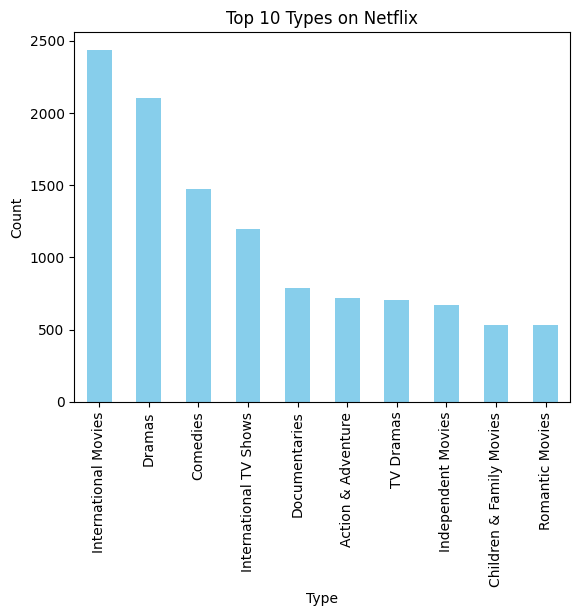

In [184]:
# --- Split and explode 'Type' column safely ---
df['Type'] = df['Type'].astype(str).apply(lambda x: x.split(','))  # convert to string, then split
genre_data = df.explode('Type')
genre_data['Type'] = genre_data['Type'].str.strip()                # remove extra spaces

# --- Plot Top 10 Types ---
top_types = genre_data['Type'].value_counts().head(10)
top_types.plot(kind='bar', color='skyblue')
plt.title('Top 10 Types on Netflix')
plt.ylabel('Count')
plt.show()

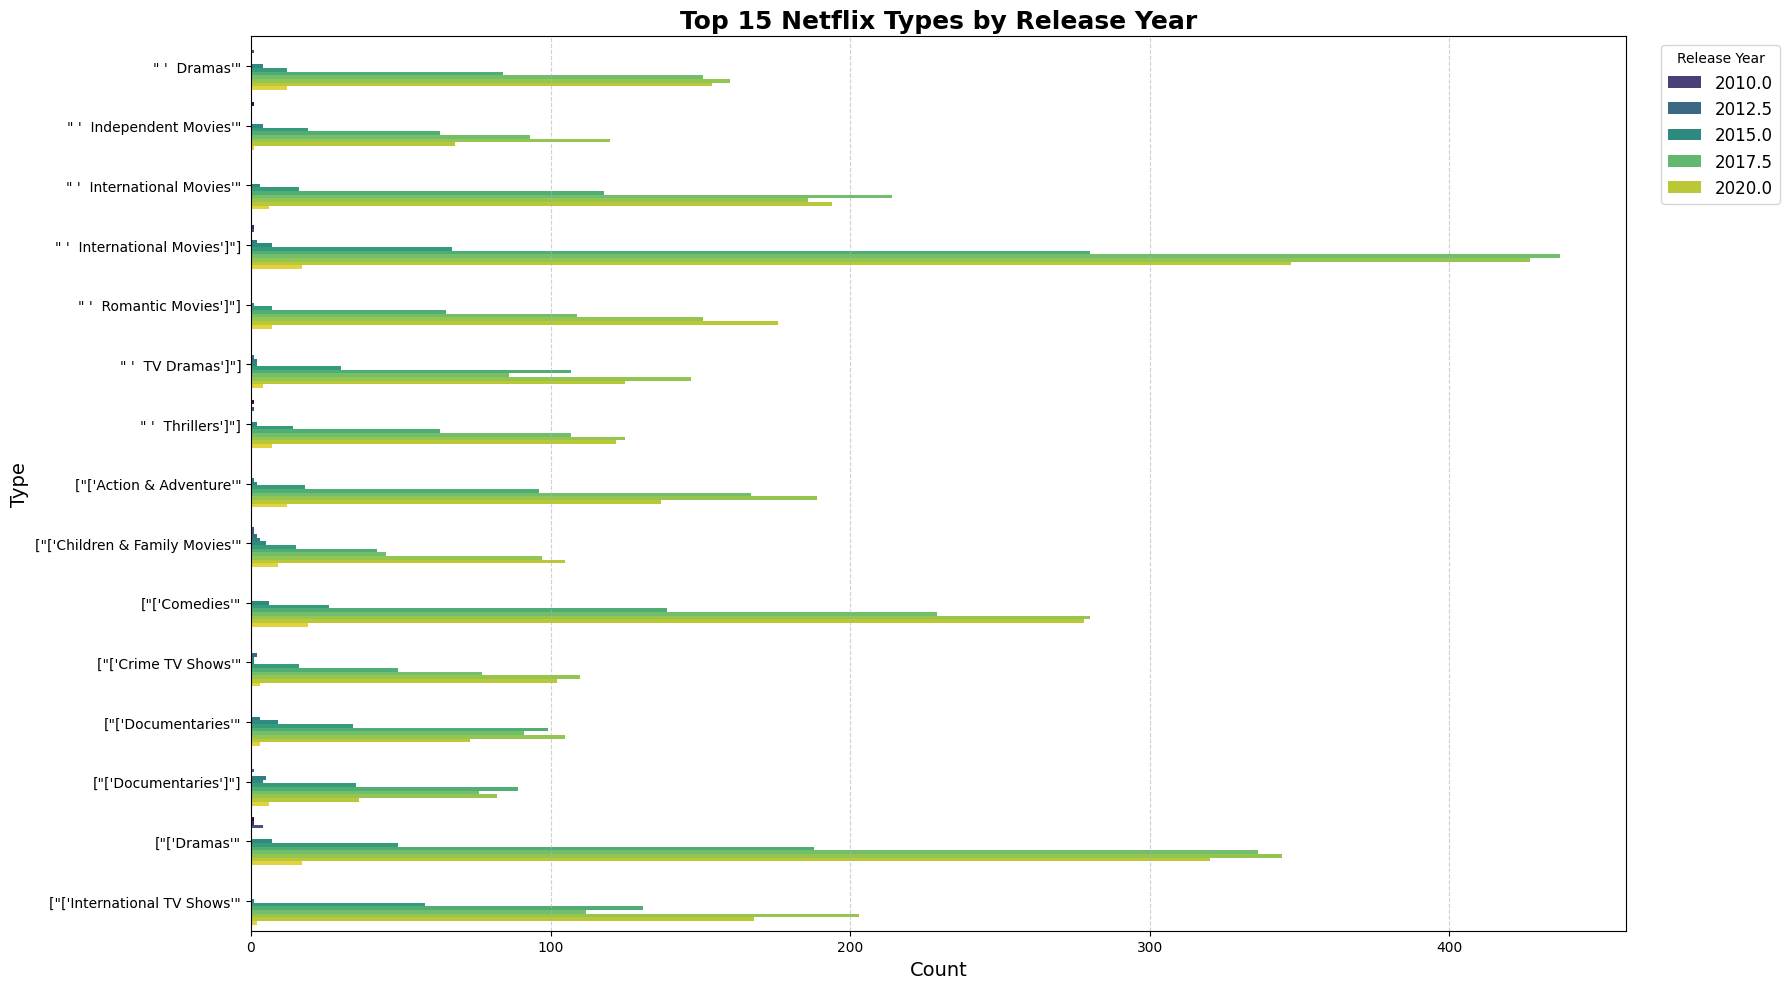

In [187]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

# --- Ensure Type is string list ---
df['Type'] = df['Type'].astype(str).apply(lambda x: x.split(','))
df_exploded = df.explode('Type')
df_exploded['Type'] = df_exploded['Type'].str.strip()

# --- Group by Type and Release Year ---
type_year = (
    df_exploded.groupby(['Type', 'Release_Year'])
    .size()
    .reset_index(name='Count')
)

# --- Take Top 15 Most Common Types ---
top_types = type_year.groupby('Type')['Count'].sum().nlargest(15).index
type_year_top = type_year[type_year['Type'].isin(top_types)]

# --- Plot ---
plt.figure(figsize=(18, 10))  # 🔹 Bigger graph
sns.barplot(
    data=type_year_top,
    x='Count',
    y='Type',
    hue='Release_Year',
    palette='viridis'
)

plt.title('Top 15 Netflix Types by Release Year', fontsize=18, weight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.legend(title='Release Year', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [189]:
country_counts = df['Country'].value_counts().head(10)
fig = px.bar(
    x=country_counts.index,
    y=country_counts.values,
    title="Top 10 Countries by Content Count",
    labels={'x': 'Country', 'y': 'Count'}
)

fig.update_layout(
    width=1000,  # bigger chart
    height=600,
    title_x=0.5,  # center title
    template='plotly_white'
)

fig.show()

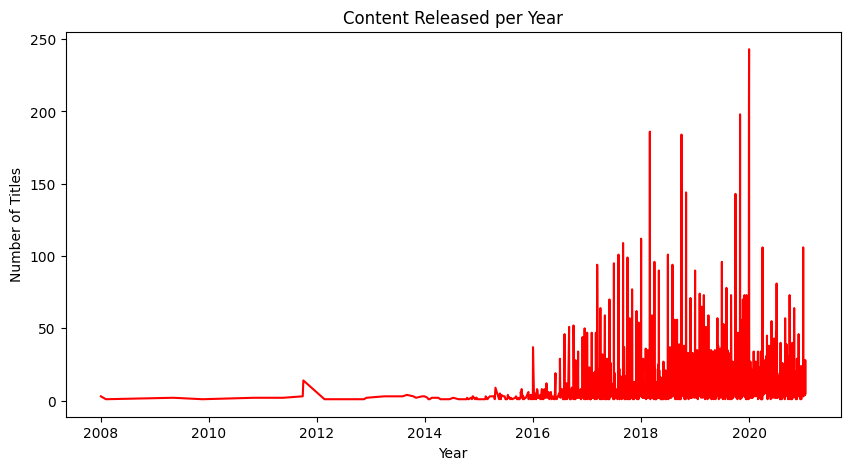

In [138]:
yearly = df.groupby('Release_Date').size()
plt.figure(figsize=(10,5))
plt.plot(yearly.index, yearly.values, color='red')
plt.title('Content Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()